## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv. 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
types = application_df.value_counts(['APPLICATION_TYPE'])
types

APPLICATION_TYPE
T3                  27037
T4                   1542
T6                   1216
T5                   1173
T19                  1065
T8                    737
T7                    725
T10                   528
T9                    156
T13                    66
T12                    27
T2                     16
T14                     3
T25                     3
T29                     2
T15                     2
T17                     1
dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(types[types<528].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classifications = application_df.value_counts(['CLASSIFICATION'])
classifications

CLASSIFICATION
C1000             17326
C2000              6074
C1200              4837
C3000              1918
C2100              1883
                  ...  
C2190                 1
C2380                 1
C2500                 1
C2561                 1
C8210                 1
Length: 71, dtype: int64

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df.CLASSIFICATION.value_counts().loc[lambda x: x>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C2400        6
C4100        6
C1720        6
C1600        5
C1257        5
C2710        3
C1260        3
C0           3
C3200        2
C1267        2
C1256        2
C1234        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [14]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classifications[classifications<100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_df = pd.get_dummies(application_df)
dummy_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
# Split our preprocessed data into our features and target arrays
X = dummy_df.drop(columns=['IS_SUCCESSFUL']).values
y = dummy_df[['IS_SUCCESSFUL']].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [18]:
X_train.shape

(25724, 49)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
dim = 49
h1 = 80
h2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(input_dim=dim, units=h1, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=h2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                4000      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 6,461
Trainable params: 6,461
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 521us/step - loss: 88938.2734 - accuracy: 0.4956
Epoch 2/100
804/804 [==============================] - 0s 523us/step - loss: 23813.1582 - accuracy: 0.4809
Epoch 3/100
804/804 [==============================] - 0s 522us/step - loss: 27947.3223 - accuracy: 0.5156
Epoch 4/100
804/804 [==============================] - 0s 518us/step - loss: 22795.5508 - accuracy: 0.4974
Epoch 5/100
804/804 [==============================] - 0s 519us/step - loss: 56710.1406 - accuracy: 0.4893
Epoch 6/100
804/804 [==============================] - 0s 520us/step - loss: 35743.8398 - accuracy: 0.5258
Epoch 7/100
804/804 [==============================] - 0s 519us/step - loss: 12112.2666 - accuracy: 0.5205
Epoch 8/100
804/804 [==============================] - 0s 514us/step - loss: 13573.2842 - accuracy: 0.5183
Epoch 9/100
804/804 [==============================] - 0s 520us/step - loss: 18598.2754 - accuracy: 0.5260
Epoch 10/100
804/804 [===============

804/804 [==============================] - 0s 515us/step - loss: 0.6912 - accuracy: 0.5326
Epoch 80/100
804/804 [==============================] - 0s 512us/step - loss: 0.6912 - accuracy: 0.5326
Epoch 81/100
804/804 [==============================] - 0s 515us/step - loss: 0.6912 - accuracy: 0.5326
Epoch 82/100
804/804 [==============================] - 0s 513us/step - loss: 0.6912 - accuracy: 0.5326
Epoch 83/100
804/804 [==============================] - 0s 516us/step - loss: 0.6912 - accuracy: 0.5326
Epoch 84/100
804/804 [==============================] - 0s 515us/step - loss: 0.6911 - accuracy: 0.5326
Epoch 85/100
804/804 [==============================] - 0s 521us/step - loss: 0.6911 - accuracy: 0.5326
Epoch 86/100
804/804 [==============================] - 0s 514us/step - loss: 0.6912 - accuracy: 0.5326
Epoch 87/100
804/804 [==============================] - 0s 512us/step - loss: 0.6911 - accuracy: 0.5326
Epoch 88/100
804/804 [==============================] - 0s 517us/step - loss:

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6729 - accuracy: 0.6954
Loss: 0.6728790998458862, Accuracy: 0.6953935623168945


In [23]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

## Attempt 2

In [47]:
# Split our preprocessed data into our features and target arrays
X = dummy_df.drop(columns=['IS_SUCCESSFUL']).values
y = dummy_df[['IS_SUCCESSFUL']].values

# X_train, X_test, y_train, y_test = train_test_split(X, y)

# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [34]:
X

array([[       1,     5000,        0, ...,        0,        1,        0],
       [       1,   108590,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       ...,
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1, 36500179,        0, ...,        0,        1,        0]],
      dtype=int64)

In [35]:
#Trying a different approach to scaling the data and performing dimensionality reduction with PCA and t-SNE
scaled_data = StandardScaler().fit_transform(X)
scaled_data

array([[ 0.01207469, -0.03172529, -0.09006753, ..., -0.07364098,
         0.02806804, -0.02806804],
       [ 0.01207469, -0.03053637, -0.09006753, ..., -0.07364098,
         0.02806804, -0.02806804],
       [ 0.01207469, -0.03172529, -0.09006753, ..., -0.07364098,
         0.02806804, -0.02806804],
       ...,
       [ 0.01207469, -0.03172529, -0.09006753, ..., -0.07364098,
         0.02806804, -0.02806804],
       [ 0.01207469, -0.03172529, -0.09006753, ..., -0.07364098,
         0.02806804, -0.02806804],
       [ 0.01207469,  0.38713757, -0.09006753, ..., -0.07364098,
         0.02806804, -0.02806804]])

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)

pca_out = pca.fit_transform(scaled_data)

pca_out

array([[ 3.29699795,  0.98290348,  0.16841491, ..., -0.50094037,
         0.9002848 ,  1.82629577],
       [-1.16491657,  1.96748857,  0.25805176, ...,  1.04816411,
         0.49326232, -2.02564534],
       [ 6.18249711,  0.65728995,  0.042445  , ...,  0.39376222,
         0.43474406, -0.35107629],
       ...,
       [ 0.88770127, -2.49813302,  0.01847861, ...,  0.41800909,
        -0.68102092, -1.26858978],
       [ 5.19035631,  2.18288886,  0.05200586, ...,  0.41098787,
         0.55166904, -0.09254999],
       [-1.29915371,  2.51053179, -0.18869627, ..., -0.55947028,
        -1.85215379,  0.88324529]])

In [37]:
pca_out.shape

(34299, 34)

In [38]:
#further reduce the dataset dimensions with t-SNE and visually inspect the results.
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=100)    

tsne_out = tsne.fit_transform(pca_out)

tsne_out

array([[ 30.682795 ,  25.09834  ],
       [ 36.55882  ,   5.5712743],
       [-14.020823 ,  22.770348 ],
       ...,
       [-10.541149 , -12.52139  ],
       [-23.448286 ,  20.021032 ],
       [-19.262909 ,  17.295269 ]], dtype=float32)

In [39]:
tsne_out.shape

(34299, 2)

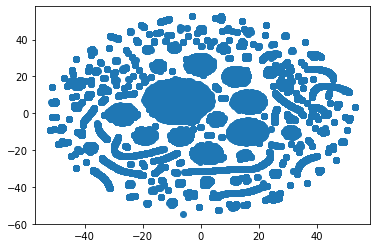

In [46]:
#Split X and Y, just wanted to see what the plot would look like. Kind of wild.
import matplotlib.pyplot as plt
X = tsne_out[:,0]
i = tsne_out[:,1]

plt.scatter(X, i)
plt.show()

In [48]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(tsne_out, y)

In [51]:
dim = 2
h1 = 80
h2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(input_dim=dim, units=h1, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=h2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 507us/step - loss: 0.6775 - accuracy: 0.6064
Epoch 2/100
804/804 [==============================] - 0s 509us/step - loss: 0.6505 - accuracy: 0.6345
Epoch 3/100
804/804 [==============================] - 0s 504us/step - loss: 0.6370 - accuracy: 0.6494
Epoch 4/100
804/804 [==============================] - 0s 507us/step - loss: 0.6316 - accuracy: 0.6539
Epoch 5/100
804/804 [==============================] - 0s 517us/step - loss: 0.6286 - accuracy: 0.6575
Epoch 6/100
804/804 [==============================] - 0s 538us/step - loss: 0.6244 - accuracy: 0.6614
Epoch 7/100
804/804 [==============================] - 0s 509us/step - loss: 0.6199 - accuracy: 0.6625
Epoch 8/100
804/804 [==============================] - 0s 504us/step - loss: 0.6205 - accuracy: 0.6646
Epoch 9/100
804/804 [==============================] - 0s 519us/step - loss: 0.6155 - accuracy: 0.6716
Epoch 10/100
804/804 [==============================] - 0s 512us/step - l

804/804 [==============================] - 0s 512us/step - loss: 0.5885 - accuracy: 0.6944
Epoch 80/100
804/804 [==============================] - 0s 514us/step - loss: 0.5890 - accuracy: 0.6921
Epoch 81/100
804/804 [==============================] - 0s 494us/step - loss: 0.5881 - accuracy: 0.6934
Epoch 82/100
804/804 [==============================] - 0s 515us/step - loss: 0.5890 - accuracy: 0.6937
Epoch 83/100
804/804 [==============================] - 0s 514us/step - loss: 0.5886 - accuracy: 0.6946
Epoch 84/100
804/804 [==============================] - 0s 514us/step - loss: 0.5889 - accuracy: 0.6933
Epoch 85/100
804/804 [==============================] - 0s 515us/step - loss: 0.5877 - accuracy: 0.6953
Epoch 86/100
804/804 [==============================] - 0s 515us/step - loss: 0.5877 - accuracy: 0.6938
Epoch 87/100
804/804 [==============================] - 0s 514us/step - loss: 0.5879 - accuracy: 0.6937
Epoch 88/100
804/804 [==============================] - 0s 487us/step - loss:

In [54]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5815 - accuracy: 0.7073
Loss: 0.5814740657806396, Accuracy: 0.7072886228561401


## Attempt 3

In [55]:
dim = 2
h1 = 50
h2 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(input_dim=dim, units=h1, activation='tanh'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=h2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 26        
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=75)

Epoch 1/75
804/804 [==============================] - 1s 499us/step - loss: 0.6408 - accuracy: 0.6347
Epoch 2/75
804/804 [==============================] - 0s 517us/step - loss: 0.6250 - accuracy: 0.6545
Epoch 3/75
804/804 [==============================] - 0s 510us/step - loss: 0.6202 - accuracy: 0.6625
Epoch 4/75
804/804 [==============================] - 0s 502us/step - loss: 0.6177 - accuracy: 0.6642
Epoch 5/75
804/804 [==============================] - 0s 516us/step - loss: 0.6163 - accuracy: 0.6623
Epoch 6/75
804/804 [==============================] - 0s 487us/step - loss: 0.6146 - accuracy: 0.6661
Epoch 7/75
804/804 [==============================] - 0s 485us/step - loss: 0.6133 - accuracy: 0.6645
Epoch 8/75
804/804 [==============================] - 0s 489us/step - loss: 0.6124 - accuracy: 0.6657
Epoch 9/75
804/804 [==============================] - 0s 489us/step - loss: 0.6109 - accuracy: 0.6653
Epoch 10/75
804/804 [==============================] - 0s 490us/step - loss: 0.609

In [58]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5810 - accuracy: 0.7036
Loss: 0.5810101628303528, Accuracy: 0.7035568356513977


In [59]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")